# 1.　はじめに

## 1.1　研究目的
- ウェアラブル製造企業の成功要因の技術的側面の探求

## 1.2　研究方法
- アマゾンから入手した製品毎のレビューに関する情報（レビュー値、レビュー件数）より、成功企業と非成功企業にグループ分けをする。
- 成功企業と非成功企業の出願傾向の差を評価し、特徴を見出す

In [1]:
# coding: shift-jis
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_amazon = pd.read_csv('api_data_smart_watches.csv')

# 2. 企業分類
## 2.1 対象となるデータ集団
- レビュー件数が10件以上
## 2.2 閾値
- 分布より判断する。
- 今回の場合はレビュー値が4.0以上が成功企業とする。
- 今回の場合はレビュー値が3.5以上、3.8以下の企業を非成功企業とする。
## 2.3 分類結果
- レビュー件数が10件以上、かつ、特許出願が複数確認できた企業が対象
- 成功企業はレビュー値が4.0以上の企業→サムスン、エイサス
- 比較対象はレビュー値が3.5以上、3.8以下の企業→ソニー、モトローラ

In [2]:
data_amazon.columns

Index([u'asin', u'date', u'manufacturer', u'price', u'rank', u'average_rate',
       u'num_of_rate', u'review_url'],
      dtype='object')

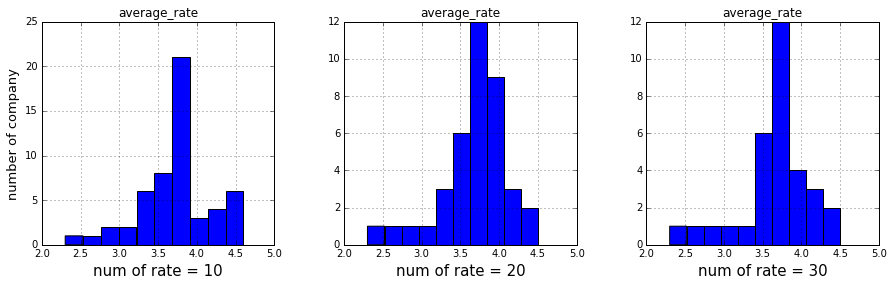

In [3]:
fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
data_amazon[data_amazon['num_of_rate'] >= 10].hist('average_rate',ax=ax1,bins=10)
data_amazon[data_amazon['num_of_rate'] >= 20].hist('average_rate',ax=ax2,bins=10)
data_amazon[data_amazon['num_of_rate'] >= 30].hist('average_rate',ax=ax3,bins=10)
ax1.set_xlabel("num of rate = 10",fontsize=15)
ax2.set_xlabel("num of rate = 20",fontsize=15)
ax3.set_xlabel("num of rate = 30",fontsize=15)
ax1.set_ylabel('number of company',fontsize=13)
plt.show()

In [7]:
data_10 = data_amazon[data_amazon[u'num_of_rate'] >= 10]
mean = data_10[u'average_rate'].mean()
std = data_10[u'average_rate'].std()
print mean,std

3.7537037037 0.474127983264


In [10]:

#succeed
suc = data_10[data_10['average_rate']>=mean+std]
print('succeeded companies are \n%s') %suc[u'manufacturer'].unique()
#normal
normal = data_10[(data_10['average_rate'] >= mean-std) & (data_10['average_rate'] <= mean+std)]
print('\nnormal companies are \n%s') %str(normal[u'manufacturer'].unique()).decode('string-escape')
#fale
fale = data_10[data_10['average_rate'] < mean-std]
print('\nfalse companies are \n%s') %str(fale[u'manufacturer'].unique()).decode('string-escape')

succeeded companies are 
['EloBeth' 'Pebble' 'Samsung' 'by Galaxy']

normal companies are 
[ 'Leesentec(リーセンテック)'
 'MisSmart' 'null' 'OEM' 'Pebble' 'OZONE' 'Sony' nan 'Withings'
 'Sleep tracker(スリープトラッカー)'
 'Motorola' 'ASUSTek' 'ソニー' 'HUAWEI'
 'Shenzhen Wave' 'Samsung']

false companies are 
['Shenzhen Wave' 'STK'
 'ネット販売専門'
 'Eagle　Eye' nan 'Sincere　Inc.']


### ※企業選択についてのコメント
#### 成功企業（succeeded companies）
- EloBethはスマートウォッチのアクセサリ
- OEMは詳細不明のため対象外。OEMで製造されたという意味か。
- by Galaxyはサムスンに名寄せ
- Pebbleは特許出願が1件だったた対象外とした。

#### 非成功企業（normal companies are）
- OZONE,Withings,Shenzhen Wave,Leesentecはいずれも、特許出願が見られないため対象外とした。

# 3. 特許データ整理
#### 3.1 分析対象特許
- 対象企業（サムスン、エイサス、モトローラ、ソニー）が出願した特許
- 技術区分「腕時計型（B0302）」が選択されている特許

#### 3.2 計算項目
- 出願件数比率（成功企業、非成功企業）
$$\frac{当該技術区分の出願件件数}{出願件数全数}$$

- 出願件数比率の差（相対値、絶対値）
$$出願件数比率（成功企業）-出願件数比率（非成功企業）$$

- P値（下記、検定を参照）

In [11]:
company_suc = [u'サムスン'] #[u'サムスン',u'ASUSTEK COMPUTER INC.',u'ペブルテクノロジー']
company_nor = [u'ソニー'] #[u'モトローラ',u'ソニー',u'ファーウェイ']
data_pat = pd.read_csv('/home/kyohei/wearable/data/01.文献リスト_特許.csv',encoding='SHIFT-JIS')
categories = pd.read_csv('/home/kyohei/wearable/data/T_小区分.csv',encoding='SHIFT-JIS')
data_suc_pat = data_pat[data_pat[u"筆頭出願人名"].isin(company_suc)]
data_fal_pat = data_pat[data_pat[u"筆頭出願人名"].isin(company_nor)]

/home/kyohei/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
data_suc_pat_watch = data_suc_pat[data_suc_pat[u"B0302"]==1]
data_fal_pat_watch = data_fal_pat[data_fal_pat[u"B0302"]==1]
print("成功企業の内訳\n%s"%data_suc_pat_watch[u'筆頭出願人名'].value_counts())
print("\n非成功企業の内訳\n%s"%data_fal_pat_watch[u'筆頭出願人名'].value_counts())

成功企業の内訳
サムスン    134
Name: 筆頭出願人名, dtype: int64

非成功企業の内訳
ソニー    36
Name: 筆頭出願人名, dtype: int64


In [13]:
data_suc_cal = data_suc_pat_watch.iloc[:,19:].count() / float(data_suc_pat_watch.shape[0])
data_fal_cal = data_fal_pat_watch.iloc[:,19:].count() / float(data_fal_pat_watch.shape[0])
compare_category = pd.concat([data_suc_cal,data_fal_cal],axis=1)
compare_category.rename(columns={0:"succeed",1:"normal"},inplace=True)
compare_category["diff"] = compare_category["succeed"] - compare_category["normal"]
compare_category["diff_abs"] = abs(compare_category["succeed"] - compare_category["normal"])

categories = categories.set_index(u"記号",drop=True)
compare_category = pd.concat([categories,compare_category],axis=1)

### ※検定
- ２×２クロス表のχ二乗検定
- 従属変数：当該技術区分に該当する文献か否か（質的変数）
- 検定の対象となる統計量：比率の差
- 独立変数の数：1
- 独立変数の種類：企業の種類
- 条件数：2
- 条件の名称：成功企業、非成功企業
- 対応の有無：無

In [14]:
data_suc_pat_watch['succeed'] = 1
data_fal_pat_watch['succeed'] = 0

data_all = pd.concat([data_suc_pat_watch,data_fal_pat_watch])
data_all = data_all.fillna(0)

data_all_cal = data_all.iloc[:,19:]
data_all_cal = data_all_cal.loc[:,((data_all_cal.sum() > 0) & (data_all_cal.sum() < data_all_cal.shape[0]))]

from scipy.stats import chi2_contingency
data_all_cal.columns[:-1]
pvalues = []
columns = data_all_cal.columns[:-1]
for row in columns:
    table = pd.crosstab(data_all_cal['succeed'],data_all_cal[row])
    chisq_value,pvalue,df,expected = chi2_contingency(table,correction=False) #補正無し:correction=False
    pvalues.append([row,pvalue,chisq_value,df])

pvalues_df = pd.DataFrame(np.array(pvalues)[:,1],index=np.array(pvalues)[:,0],columns=['pvalue'])
compare_category = pd.concat([compare_category,pvalues_df],axis=1)
compare_category['pvalue'] = compare_category['pvalue'].astype(float)

/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


# 4. 分析結果（小区分全体）
### 4.1 プラス域（成功企業の方が比率が高い）の注目技術
- 操作性の向上
- ディスプレイ
- 高精度情報化
- 小型軽量化
- タッチパネル

### 4.2 マイナス域（非成功企業の方が比率が高い）の注目技術
- 中央演算装置（CPU）
- サーバー
- お知らせ・注意・指示
- ユーザ状態の正確な把握
- 健康
- wifi
- Bluetooth
- センサー（発刊、湿度、加速度、ジャイロ、GPS、心拍）
- 情報（温度、湿度、地形、距離、ユーザ音声（入力））
- 運動の動機付け

### 4.3 考察
成功企業は操作性の向上や、小型軽量化、タッチパネル、ディスプレイなどの出願件数比率が高く。操作のしやすさや、軽さなどが差別化要因と捉えているのではないかと考えられる。他方、非成功企業では、様々な機能の付加を差別化要因と捉えているように考えられる。処理性能のCPU、通信系のwifi,Bluetoothに加えて、多様なセンサーや、扱う情報種も豊富である。更に、音声入力についても力を入れていると推測される。

### プラス域

In [15]:
compare_category.sort_values('diff',ascending=False).head(20).style.bar(subset=['succeed','normal','diff_abs'],color='#d65f5f')

### マイナス域 

In [16]:
compare_category.sort_values('diff',ascending=True).head(30).style.bar(subset=['succeed','normal','diff_abs'],color='#d65f5f')

### 絶対値

In [17]:
compare_category[compare_category['diff_abs'] >= 0.2].sort_values('diff_abs',ascending=False).style.bar(subset=['succeed','normal','diff_abs'],color='#d65f5f')

# 5. 分析結果（中区分毎）

### 5.1 効果・価値
- 操作性の向上では、成功企業の比率が高かった。
- ユーザビリティでは差が出なかった。
- ユーザ状態の正確な把握、運動・勉強などへの動機付けは非成功企業の比率が高かった。

In [18]:
compare_category[compare_category.index.str.startswith("C01")].style.bar(subset=['succeed','normal','diff_abs'],color='#d65f5f')

### 5.2 全体設計デザイン
- 小型・軽量化では成功企業の比率が高かった。
- 低コスト化、耐久性では差は出なかった。

In [19]:
compare_category[compare_category.index.str.startswith("D01")].style.bar(subset=['succeed','normal','diff_abs'],color='#d65f5f')

### 5.3 モーションセンサー
- 加速度センサ、ジャイロセンサでは非成功企業の比率が高かった。

In [20]:
compare_category[compare_category.index.str.startswith("F01")].style.bar(subset=['succeed','normal','diff_abs'],color='#d65f5f')

### 5.4 バイタルセンサー
- 心拍センサ、発汗センサでは非成功企業の出願比率が高かった。
- 血圧、血糖値などでは差は見られなかった。

In [21]:
compare_category[compare_category.index.str.startswith("F02")].style.bar(subset=['succeed','normal','diff_abs'],color='#d65f5f')

### 5.5 医療用途
- 差は見られなかった。

In [22]:
compare_category[compare_category.index.str.startswith("H02")].style.bar(subset=['succeed','normal','diff_abs'],color='#d65f5f')

### 5.6 ヘルスケア用途
- 健康では非成功企業の出願比率が高かった。

In [23]:
compare_category[compare_category.index.str.startswith("H03")].style.bar(subset=['succeed','normal','diff_abs'],color='#d65f5f')

### 5.7 スポーツ用途
- 全体で差は見られなかった。

In [24]:
compare_category[compare_category.index.str.startswith("H04")].style.bar(subset=['succeed','normal','diff_abs'],color='#d65f5f')

### 5.8 バイタルデータ
- 虹彩・網膜情報で、顔情報で非成功企業に差が出たが、いのある技術区分とは捉えられない。おそらく、他のウェアラブルデバイスや環境センサから取得される情報であり。スマートウォッチに直接関係はないと考えられる。

In [25]:
compare_category[compare_category.index.str.startswith("I07")].style.bar(subset=['succeed','normal','diff_abs'],color='#d65f5f')

### 5.9 電源装置

In [26]:
compare_category[compare_category.index.str.startswith("D02")].style.bar(subset=['succeed','normal','diff_abs'],color='#d65f5f')

In [27]:
compare_category.to_csv('compare_result.csv',encoding='utf-8')